### ADDITIONAL PROJECTS- NORMAL TASK- MOBILE PRICE CLASSIFICATION CODERSCAVE

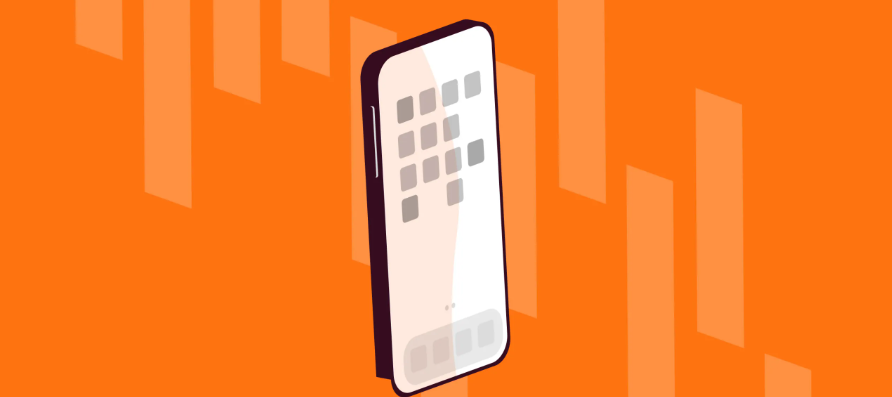

#### Boosting 
- Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. 
- It is done by building a model by using weak models in series. 
- A random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

#### Types of Boosting
- Adaptive boosting
- Gradient boosting
- Extreme gradient boosting

#### Objective
- The objective is to build the best model which can predict the price range of a mobile phone using the given features.

#### Applied Boosting models -
- Adaboost
- Gradient Boosting
- XGBoost

#### Dataset source & brief
- The dataset is divided into Train & Test & has been sourced from Kaggle.
- It includes 21 columns having different specification of mobile. Price_range is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

#### Import the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load and read the dataset

In [2]:
train = pd.read_csv(r"C:\Users\manme\Documents\Priya\Stats and ML\Dataset\New folder\train.csv")
test = pd.read_csv(r"C:\Users\manme\Documents\Priya\Stats and ML\Dataset\New folder\test.csv")

In [3]:
train.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1


In [4]:
test.head(1)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0


#### Basic info

In [5]:
print(train.shape, test.shape) ## checking shape

(2000, 21) (1000, 21)


In [33]:
df.duplicated().sum()  #check duplicates

0

In [35]:
df.describe().T.style.background_gradient(cmap='Blues') # Statistical summary

,count,mean,std,min,25%,50%,75%,max
Battery,3000.000000,1241.849000,437.063804,500.000000,863.750000,1232.000000,1619.000000,1999.000000
Bluetooth,3000.000000,0.502000,0.500079,0.000000,0.000000,1.000000,1.000000,1.000000
Clockspeed,3000.000000,1.528467,0.820358,0.500000,0.700000,1.500000,2.300000,3.000000
Dualsim,3000.000000,0.512000,0.499939,0.000000,0.000000,1.000000,1.000000,1.000000
FrontCameramegapixels,3000.000000,4.404000,4.383742,0.000000,1.000000,3.000000,7.000000,19.000000
4G,3000.000000,0.510000,0.499983,0.000000,0.000000,1.000000,1.000000,1.000000
Internal_Memory,3000.000000,32.581667,18.152810,2.000000,16.000000,33.000000,48.000000,64.000000
Mobile_Depth,3000.000000,0.507000,0.285969,0.100000,0.200000,0.500000,0.800000,1.000000
Weight_of_mobile,3000.000000,140.003000,35.213809,80.000000,109.000000,140.000000,170.000000,200.000000
Number_of_cores_processor,3000.000000,4.456333,2.289361,1.000000,2.000000,4.000000,6.000000,8.000000


In [6]:
train['data'] = 'train' # adding a new variable to both datsets
test['data'] = 'test'

In [7]:
train.isnull().sum()  # checking null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
data             0
dtype: int64

In [8]:
test.isnull().sum()  # checking null values

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
data             0
dtype: int64

In [9]:
test.drop(['id'],axis=1,inplace=True)    # dropping id from test data

In [10]:
for i in train.columns:      
    print("----------------------", i ,
         "-----------------------")
    print()
    print(set(train[i].tolist()))
    print()

---------------------- battery_power -----------------------

{501, 502, 503, 504, 506, 507, 508, 509, 510, 511, 512, 513, 514, 516, 517, 518, 519, 520, 523, 525, 527, 528, 530, 531, 532, 534, 535, 536, 537, 538, 539, 541, 543, 544, 545, 546, 547, 548, 550, 551, 553, 554, 555, 557, 558, 559, 560, 561, 563, 564, 565, 568, 569, 570, 571, 574, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 587, 589, 590, 591, 592, 593, 594, 595, 596, 598, 599, 600, 601, 602, 603, 605, 606, 608, 609, 610, 612, 614, 615, 616, 617, 618, 621, 622, 623, 625, 626, 627, 628, 630, 633, 634, 635, 636, 637, 638, 640, 641, 642, 643, 644, 645, 648, 649, 651, 652, 654, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 671, 672, 673, 674, 675, 676, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 694, 695, 696, 697, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 712, 713, 714, 715, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 737, 739, 740, 741, 742, 743, 744, 74

In [11]:
for i in test.columns:
    print("----------------------", i ,
         "-----------------------")
    print()
    print(set(test[i].tolist()))
    print()

---------------------- battery_power -----------------------

{500, 504, 507, 510, 511, 517, 518, 519, 520, 521, 524, 529, 530, 532, 533, 534, 535, 536, 541, 542, 543, 544, 546, 547, 549, 553, 556, 557, 558, 559, 560, 562, 564, 567, 569, 572, 574, 575, 576, 578, 579, 582, 583, 586, 588, 590, 591, 597, 600, 602, 603, 607, 608, 609, 613, 617, 621, 623, 624, 626, 628, 630, 632, 635, 636, 639, 640, 643, 644, 645, 646, 649, 650, 651, 652, 654, 656, 657, 658, 660, 664, 666, 667, 669, 671, 674, 675, 676, 679, 681, 683, 685, 687, 690, 694, 695, 697, 700, 701, 702, 703, 706, 708, 709, 710, 712, 716, 717, 718, 721, 723, 725, 726, 727, 732, 733, 734, 735, 739, 740, 743, 744, 750, 756, 757, 758, 761, 762, 763, 767, 768, 769, 770, 776, 781, 782, 785, 786, 788, 790, 792, 794, 795, 796, 797, 800, 803, 804, 805, 812, 815, 817, 819, 820, 822, 823, 825, 829, 831, 833, 837, 839, 840, 841, 842, 844, 848, 852, 853, 854, 859, 861, 863, 868, 871, 873, 875, 876, 877, 880, 881, 882, 885, 886, 888, 890, 894, 89

In [12]:
df = pd.concat([train, test], axis=0)     #concatenating both datasets

In [13]:
df.shape   #checking revised shape

(3000, 22)

In [14]:
df.columns   #column names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'data'],
      dtype='object')

In [15]:
#renaming column name for easy understanding
renamed_col={'battery_power': 'Battery','blue': 'Bluetooth','clock_speed': 'Clockspeed', 'dual_sim': 'Dualsim',
             'fc': 'FrontCameramegapixels','four_g': '4G','int_memory': 'Internal_Memory','m_dep': 'Mobile_Depth',
             'mobile_wt': 'Weight_of_mobile','n_cores': 'Number_of_cores_processor','pc': 'PrimaryCamera_megapixels',
             'px_height': 'Pixel_Resolution_Height','px_width': 'Pixel_Resolution_Width','ram': 'RAM','sc_h': 'Screen Height',
             'sc_w': 'Screen_Width','talk_time': 'Talk_time','three_g': '3G','touch_screen': 'Touch_screen','wifi': 'Wifi',
             'price_range': 'Price_range'}
df.rename(columns=renamed_col,inplace=True)

In [16]:
df.columns  #renamed columns

Index(['Battery', 'Bluetooth', 'Clockspeed', 'Dualsim',
       'FrontCameramegapixels', '4G', 'Internal_Memory', 'Mobile_Depth',
       'Weight_of_mobile', 'Number_of_cores_processor',
       'PrimaryCamera_megapixels', 'Pixel_Resolution_Height',
       'Pixel_Resolution_Width', 'RAM', 'Screen Height', 'Screen_Width',
       'Talk_time', '3G', 'Touch_screen', 'Wifi', 'Price_range', 'data'],
      dtype='object')

In [17]:
df.info()   #checking info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Battery                    3000 non-null   int64  
 1   Bluetooth                  3000 non-null   int64  
 2   Clockspeed                 3000 non-null   float64
 3   Dualsim                    3000 non-null   int64  
 4   FrontCameramegapixels      3000 non-null   int64  
 5   4G                         3000 non-null   int64  
 6   Internal_Memory            3000 non-null   int64  
 7   Mobile_Depth               3000 non-null   float64
 8   Weight_of_mobile           3000 non-null   int64  
 9   Number_of_cores_processor  3000 non-null   int64  
 10  PrimaryCamera_megapixels   3000 non-null   int64  
 11  Pixel_Resolution_Height    3000 non-null   int64  
 12  Pixel_Resolution_Width     3000 non-null   int64  
 13  RAM                        3000 non-null   int64 

In [18]:
#replacing data with Train & Test
train = df[df['data']=='train']
test = df[df['data']=='test']

#### Exploratory Data Analysis

In [19]:
sns.set_style('whitegrid',{'figure.facecolor': 'pink','axes.facecolor': 'lightskyblue','axes.edgecolor': '1',
                           'grid.linestyle': ':','grid.color': '.1'})

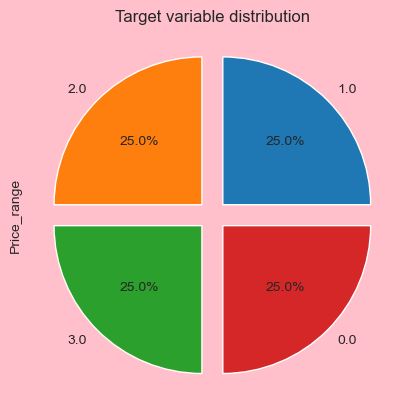

In [20]:
df['Price_range'].value_counts().plot(kind='pie',explode=[0.1,0.1,0.1,0.1],autopct='%0.1f%%')
plt.title('Target variable distribution')
plt.show()

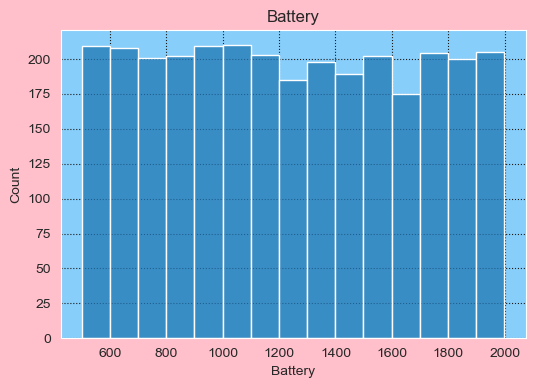

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(x='Battery', data=df,palette="plasma")
plt.title('Battery')
plt.show()

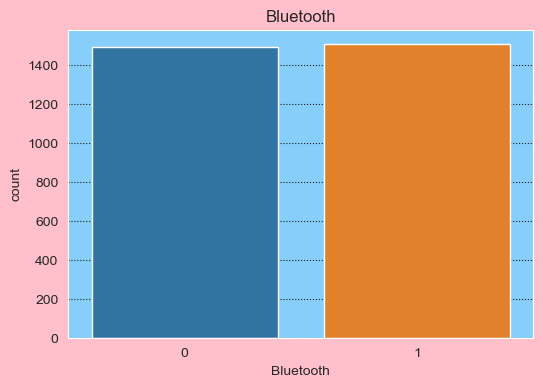

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Bluetooth',data=df)
plt.title('Bluetooth')
plt.show()

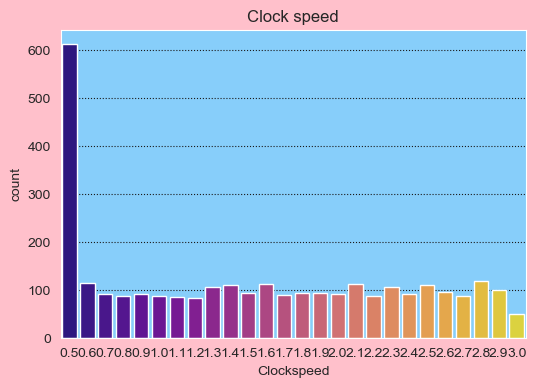

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Clockspeed', data=df,palette="plasma")
plt.title('Clock speed')
plt.show()

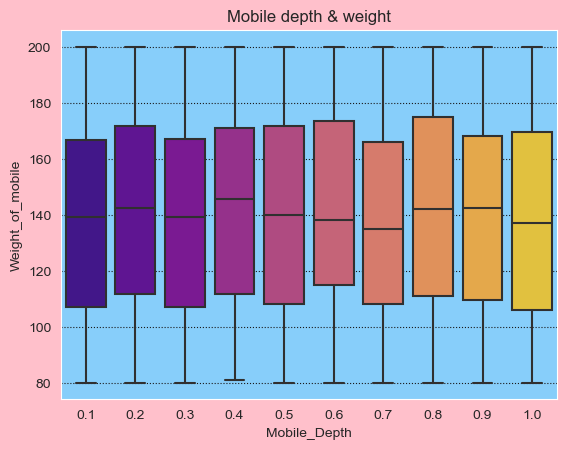

In [24]:
sns.boxplot(x='Mobile_Depth',y='Weight_of_mobile',palette='plasma',data=df)
plt.title('Mobile depth & weight')
plt.show()

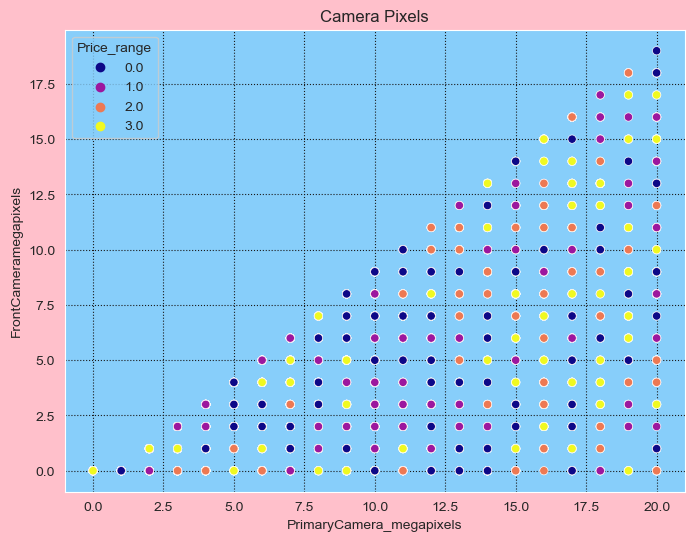

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PrimaryCamera_megapixels',y='FrontCameramegapixels',hue='Price_range',data=df,palette='plasma')
plt.title('Camera Pixels')
plt.show()

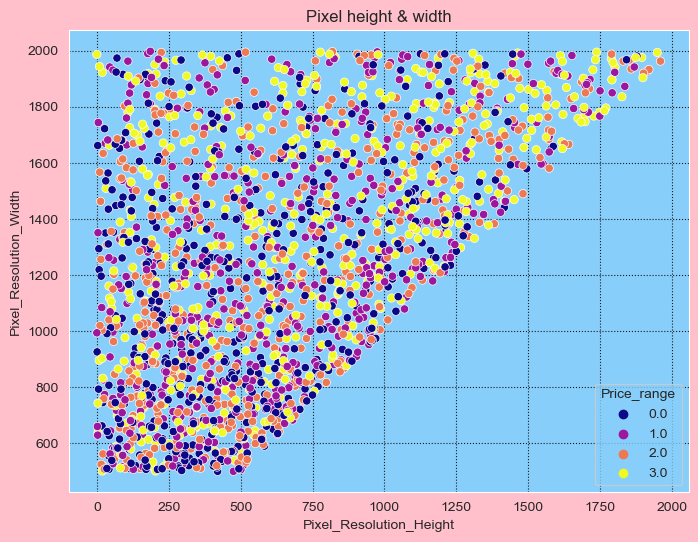

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Pixel_Resolution_Height',y='Pixel_Resolution_Width',hue='Price_range',data=df,palette='plasma')
plt.title('Pixel height & width')
plt.show()

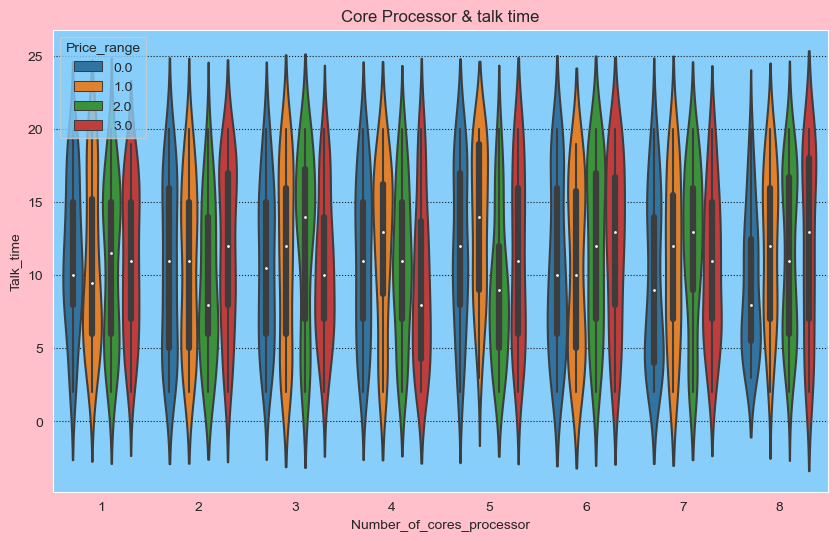

In [27]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Number_of_cores_processor',y='Talk_time',hue='Price_range',data=df)
plt.title('Core Processor & talk time')
plt.show()

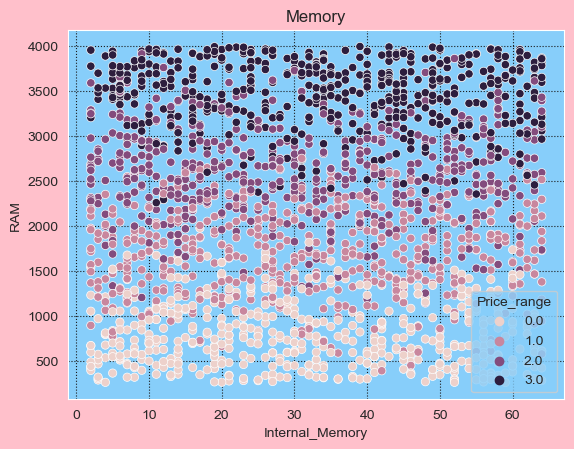

In [28]:
sns.scatterplot(x='Internal_Memory',y='RAM',hue='Price_range',data=df)
plt.title('Memory')
plt.show()

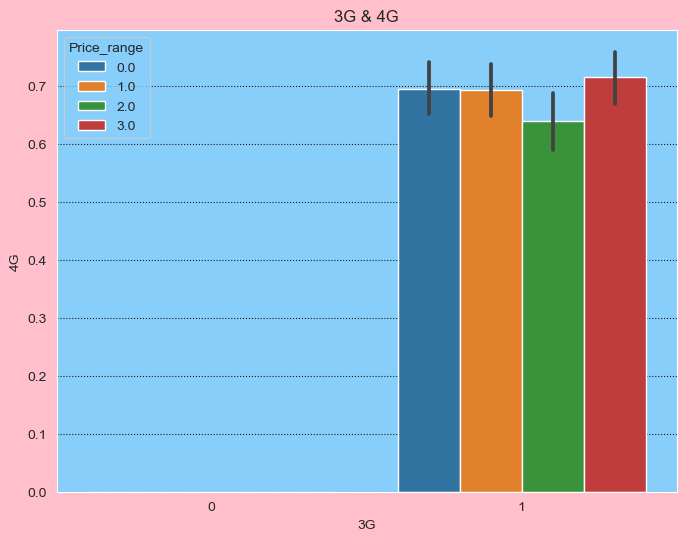

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(y='4G',x='3G',hue='Price_range',data=df)
plt.title('3G & 4G')
plt.show()

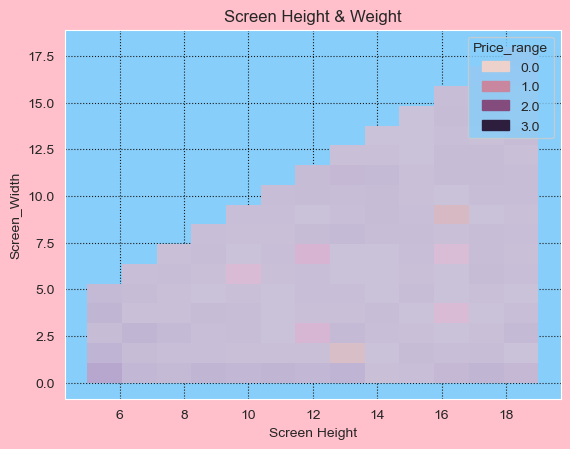

In [30]:
sns.histplot(x='Screen Height',y='Screen_Width', hue='Price_range', data=df)
plt.title('Screen Height & Weight')
plt.show()

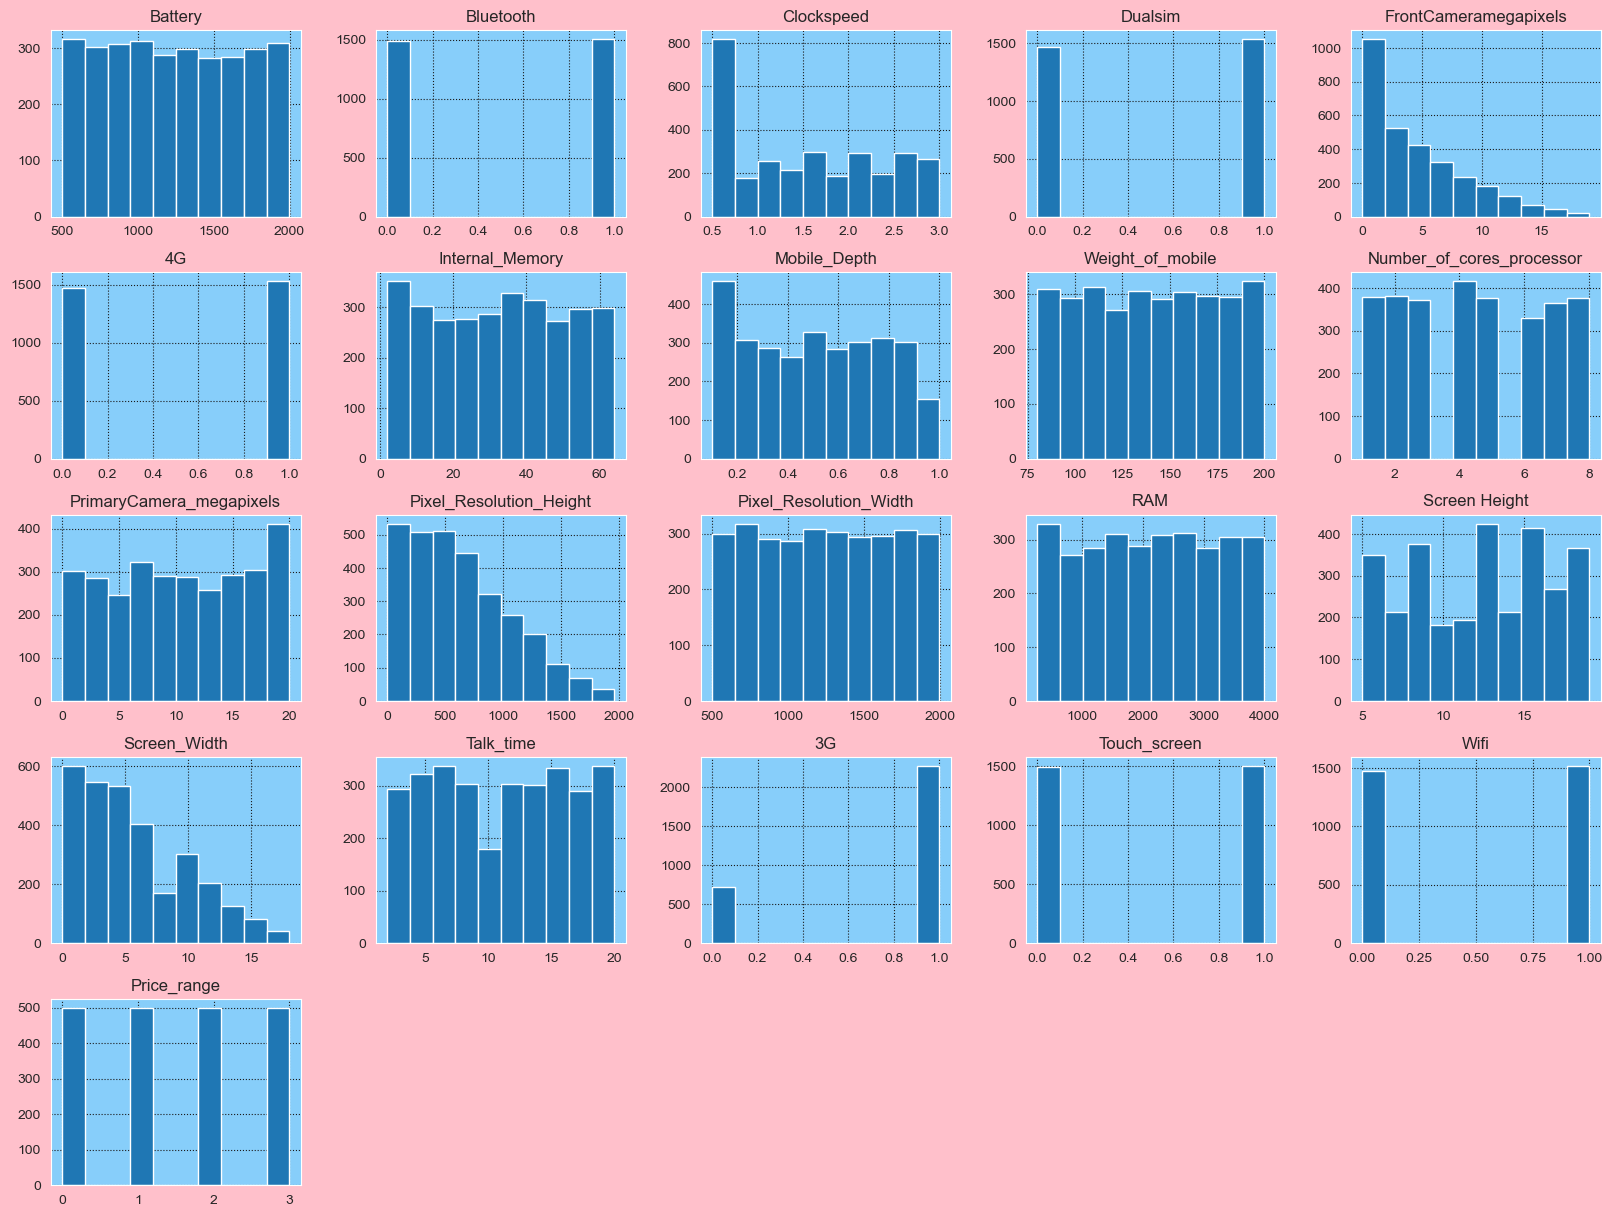

In [32]:
df.hist(figsize=(20,15))
plt.show()

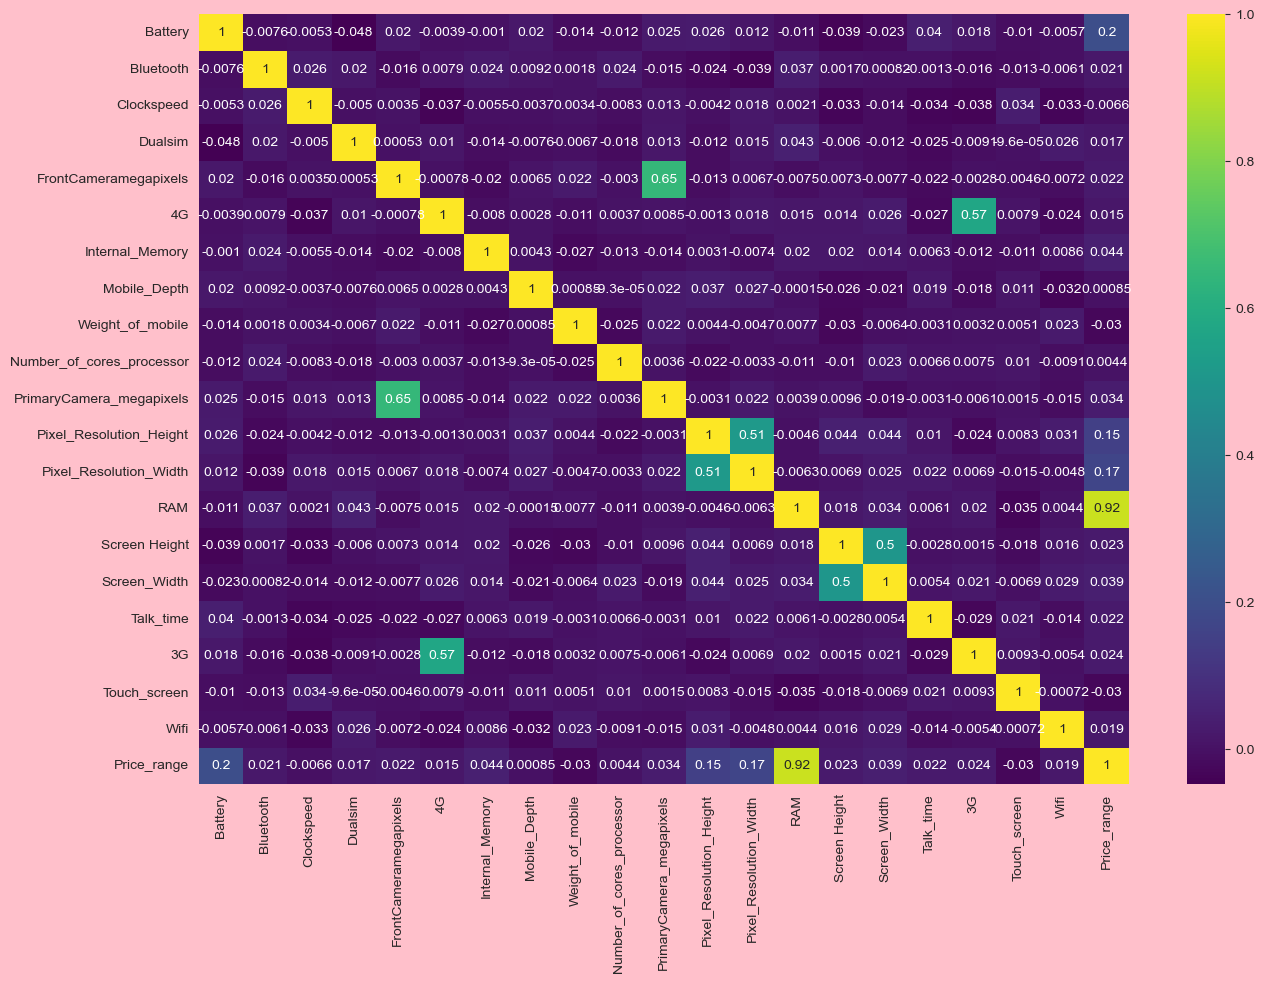

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')  # Correlation by using Heatmap 
plt.show()

#### Data Splitting

In [37]:
# split the train data into x and y
x = train.drop(['Price_range', 'data'], axis=1)
y = train[['Price_range']]

In [38]:
x.head(2)

,Battery,Bluetooth,Clockspeed,Dualsim,FrontCameramegapixels,4G,Internal_Memory,Mobile_Depth,Weight_of_mobile,Number_of_cores_processor,PrimaryCamera_megapixels,Pixel_Resolution_Height,Pixel_Resolution_Width,RAM,Screen Height,Screen_Width,Talk_time,3G,Touch_screen,Wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [39]:
y.head(2)

,Price_range
0,1.0
1,2.0


In [40]:
y.value_counts()

Price_range
0.0            500
1.0            500
2.0            500
3.0            500
dtype: int64

In [41]:
test = test.drop(['Price_range', 'data'], axis=1)

In [42]:
test.head(2)

,Battery,Bluetooth,Clockspeed,Dualsim,FrontCameramegapixels,4G,Internal_Memory,Mobile_Depth,Weight_of_mobile,Number_of_cores_processor,PrimaryCamera_megapixels,Pixel_Resolution_Height,Pixel_Resolution_Width,RAM,Screen Height,Screen_Width,Talk_time,3G,Touch_screen,Wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0


In [43]:
# split the training data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

#### Model Building

#### 1. Adaptive boosting or AdaBoost
- Yoav Freund and Robert Schapire are credited with the creation of the AdaBoost algorithm. This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.  

In [44]:
# Model building
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ad=ada.fit(x_train, y_train)

# Predict 
y_pred_ad = ada.predict(x_test)
y_pred_ad_train = ada.predict(x_train)

# Evaluate
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
accuracy_ad=accuracy_score(y_test,y_pred_ad)
accuracy_ad_train=accuracy_score(y_train,y_pred_ad_train)
print('AdaBoost Train accuracy:', accuracy_score(y_train, y_pred_ad_train))
print('-------'*5)
print('AdaBoost Test accuracy:', accuracy_score(y_test, y_pred_ad))

AdaBoost Train accuracy: 0.70125
-----------------------------------
AdaBoost Test accuracy: 0.7225


#### Cross validation - Adaboost

In [45]:
from sklearn.model_selection import cross_val_score
train_accuracy_ad = cross_val_score(ada,x_train, y_train, cv=10)
crossval_train_ad=train_accuracy_ad.mean()
test_accuracy_ad = cross_val_score(ada,x_test, y_test, cv=10)
crossval_test_ad=test_accuracy_ad.mean()
print('AdaBoost Train accuracy after Cross validation:', crossval_train_ad)
print('-------'*5)
print('AdaBoost Test accuracy after Cross validation:', crossval_test_ad)

AdaBoost Train accuracy after Cross validation: 0.6525000000000001
-----------------------------------
AdaBoost Test accuracy after Cross validation: 0.67


#### 2. Gradient Boosting
- Jerome H. Friedman developed gradient boosting, which works by sequentially adding predictors to an ensemble with each one. However, instead of changing weights of data points like AdaBoost, the gradient boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the gradient descent algorithm and boosting method.  

In [46]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd=gdb.fit(x_train, y_train)

# Predict 
y_pred_gd = gdb.predict(x_test)
y_pred_gd_train = gdb.predict(x_train)

# Evaluate
accuracy_gd=accuracy_score(y_test,y_pred_gd)
accuracy_gd_train=accuracy_score(y_train,y_pred_gd_train)
print('GradientBoosting Train accuracy:', accuracy_score(y_train, y_pred_gd_train))
print('-------'*5)
print('GradientBoosting Test accuracy:', accuracy_score(y_test, y_pred_gd))

GradientBoosting Train accuracy: 0.999375
-----------------------------------
GradientBoosting Test accuracy: 0.8825


#### Cross validation - Gradient Boosting

In [47]:
train_accuracy_gd = cross_val_score(gdb,x_train, y_train, cv=10)
crossval_train_gd=train_accuracy_gd.mean()
test_accuracy_gd= cross_val_score(gdb,x_test, y_test, cv=10)
crossval_test_gd=test_accuracy_gd.mean()
print('GradientBoosting Train accuracy after Cross validation:', crossval_train_gd)
print('---------------'*5)
print('GradientBoosting Test accuracy after Cross validation:', crossval_test_gd)

GradientBoosting Train accuracy after Cross validation: 0.9125
---------------------------------------------------------------------------
GradientBoosting Test accuracy after Cross validation: 0.825


#### 3. Extreme Gradient Boosting or XGBoost
- XGBoost is an implementation of gradient boosting that’s designed for computational speed and scale. It leverages multiple cores on the CPU, allowing for learning to occur in parallel during training.  

In [48]:
# Model building
from xgboost import XGBClassifier
xgb = XGBClassifier()
xg=xgb.fit(x_train, y_train)

# Predict 
y_pred_xg = xgb.predict(x_test)
y_pred_xg_train = xgb.predict(x_train)

# Evaluate
accuracy_xg=accuracy_score(y_test,y_pred_xg)
accuracy_xg_train=accuracy_score(y_train,y_pred_xg_train)
print('XGBoost Train accuracy:', accuracy_score(y_train, y_pred_xg_train))
print('-------'*5)
print('XGBoost Test accuracy:', accuracy_score(y_test, y_pred_xg))

XGBoost Train accuracy: 1.0
-----------------------------------
XGBoost Test accuracy: 0.89


#### Cross Validation - XGBoost

In [49]:
train_accuracy_xg= cross_val_score(xgb,x_train, y_train, cv=10)
crossval_train_xg=train_accuracy_xg.mean()
test_accuracy_xg = cross_val_score(xgb,x_test, y_test, cv=10)
crossval_test_xg=test_accuracy_xg.mean()
print('XGBoost Train accuracy after Cross validation:', crossval_train_xg)
print('---------------'*5)
print('XGBoost Test accuracy after Cross validation:', crossval_test_xg)

XGBoost Train accuracy after Cross validation: 0.906875
---------------------------------------------------------------------------
XGBoost Test accuracy after Cross validation: 0.8174999999999999


#### Combining all Models accuracy in tabular form

In [50]:
Models=['Adaboost','GradientBoosting','XGboost']
Trainacc=[accuracy_ad_train,accuracy_gd_train, accuracy_xg_train]
Testacc=[accuracy_ad,accuracy_gd, accuracy_xg]
Cross_val_train=[crossval_train_ad,crossval_train_gd,crossval_train_xg]
Cross_val_test=[crossval_test_ad,crossval_test_gd,crossval_test_xg]

In [52]:
Combined_accuracy=pd.DataFrame({'Model name':Models,'Train Accuracy':Trainacc,'Test Accuracy':Testacc,
                             'CV Train acc':Cross_val_train,'CV Test acc':Cross_val_test})
print(Combined_accuracy)

         Model name  Train Accuracy  Test Accuracy  CV Train acc  CV Test acc
0          Adaboost        0.701250         0.7225      0.652500       0.6700
1  GradientBoosting        0.999375         0.8825      0.912500       0.8250
2           XGboost        1.000000         0.8900      0.906875       0.8175


#### Voting ensemble
- Voting is an ensemble method that combines the performances of multiple models to make predictions.
- Here we will combine all 3 Boosting models.

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
evc=VotingClassifier(estimators=[('ad',ad),('gd',gd),('xg',xg)],voting='hard')
model_evc=evc.fit(x_train,y_train)
pred_evc=evc.predict(x_test)
pred_evc_train=evc.predict(x_train)

accuracy_evc=accuracy_score(y_test,pred_evc)
accuracy_evc_train=accuracy_score(y_train,pred_evc_train)

print('Voting ensemble train accuracy:', accuracy_score(y_train, pred_evc_train))
print('---------------'*5)
print('Voting ensemble train accuracy:', accuracy_score(y_test, pred_evc))

Voting ensemble train accuracy: 0.999375
---------------------------------------------------------------------------
Voting ensemble train accuracy: 0.895


#### Conclusion
- By looking at Correlation matrix we figured that the most important features  are RAM, battery and pixel width in predicting a mobile phone's price as these variables are highly correlated to price range.
- We used Boosting algorithms- AdaBoost, Gradient Boosting & XGBoost to predict mobile phones price's using all of the features in our dataset. 
- After building the different models the best performing model was Gradient Boosting and AdaBoost performed worst.
- Gradient Boosting gave train accuracy of 99% and 88% before cross validation.
- After cross validation it gave Train accuracy of 91% and Test accuracy of 82%.
- We used hard voting ensemble algorithm and it gave us Train accuracy of 99% and Test accuracy of 89%.
- Concluding the above points we can say that Gradient Boosting model is the best model to predict price range of mobile phone.